In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генерируем данные

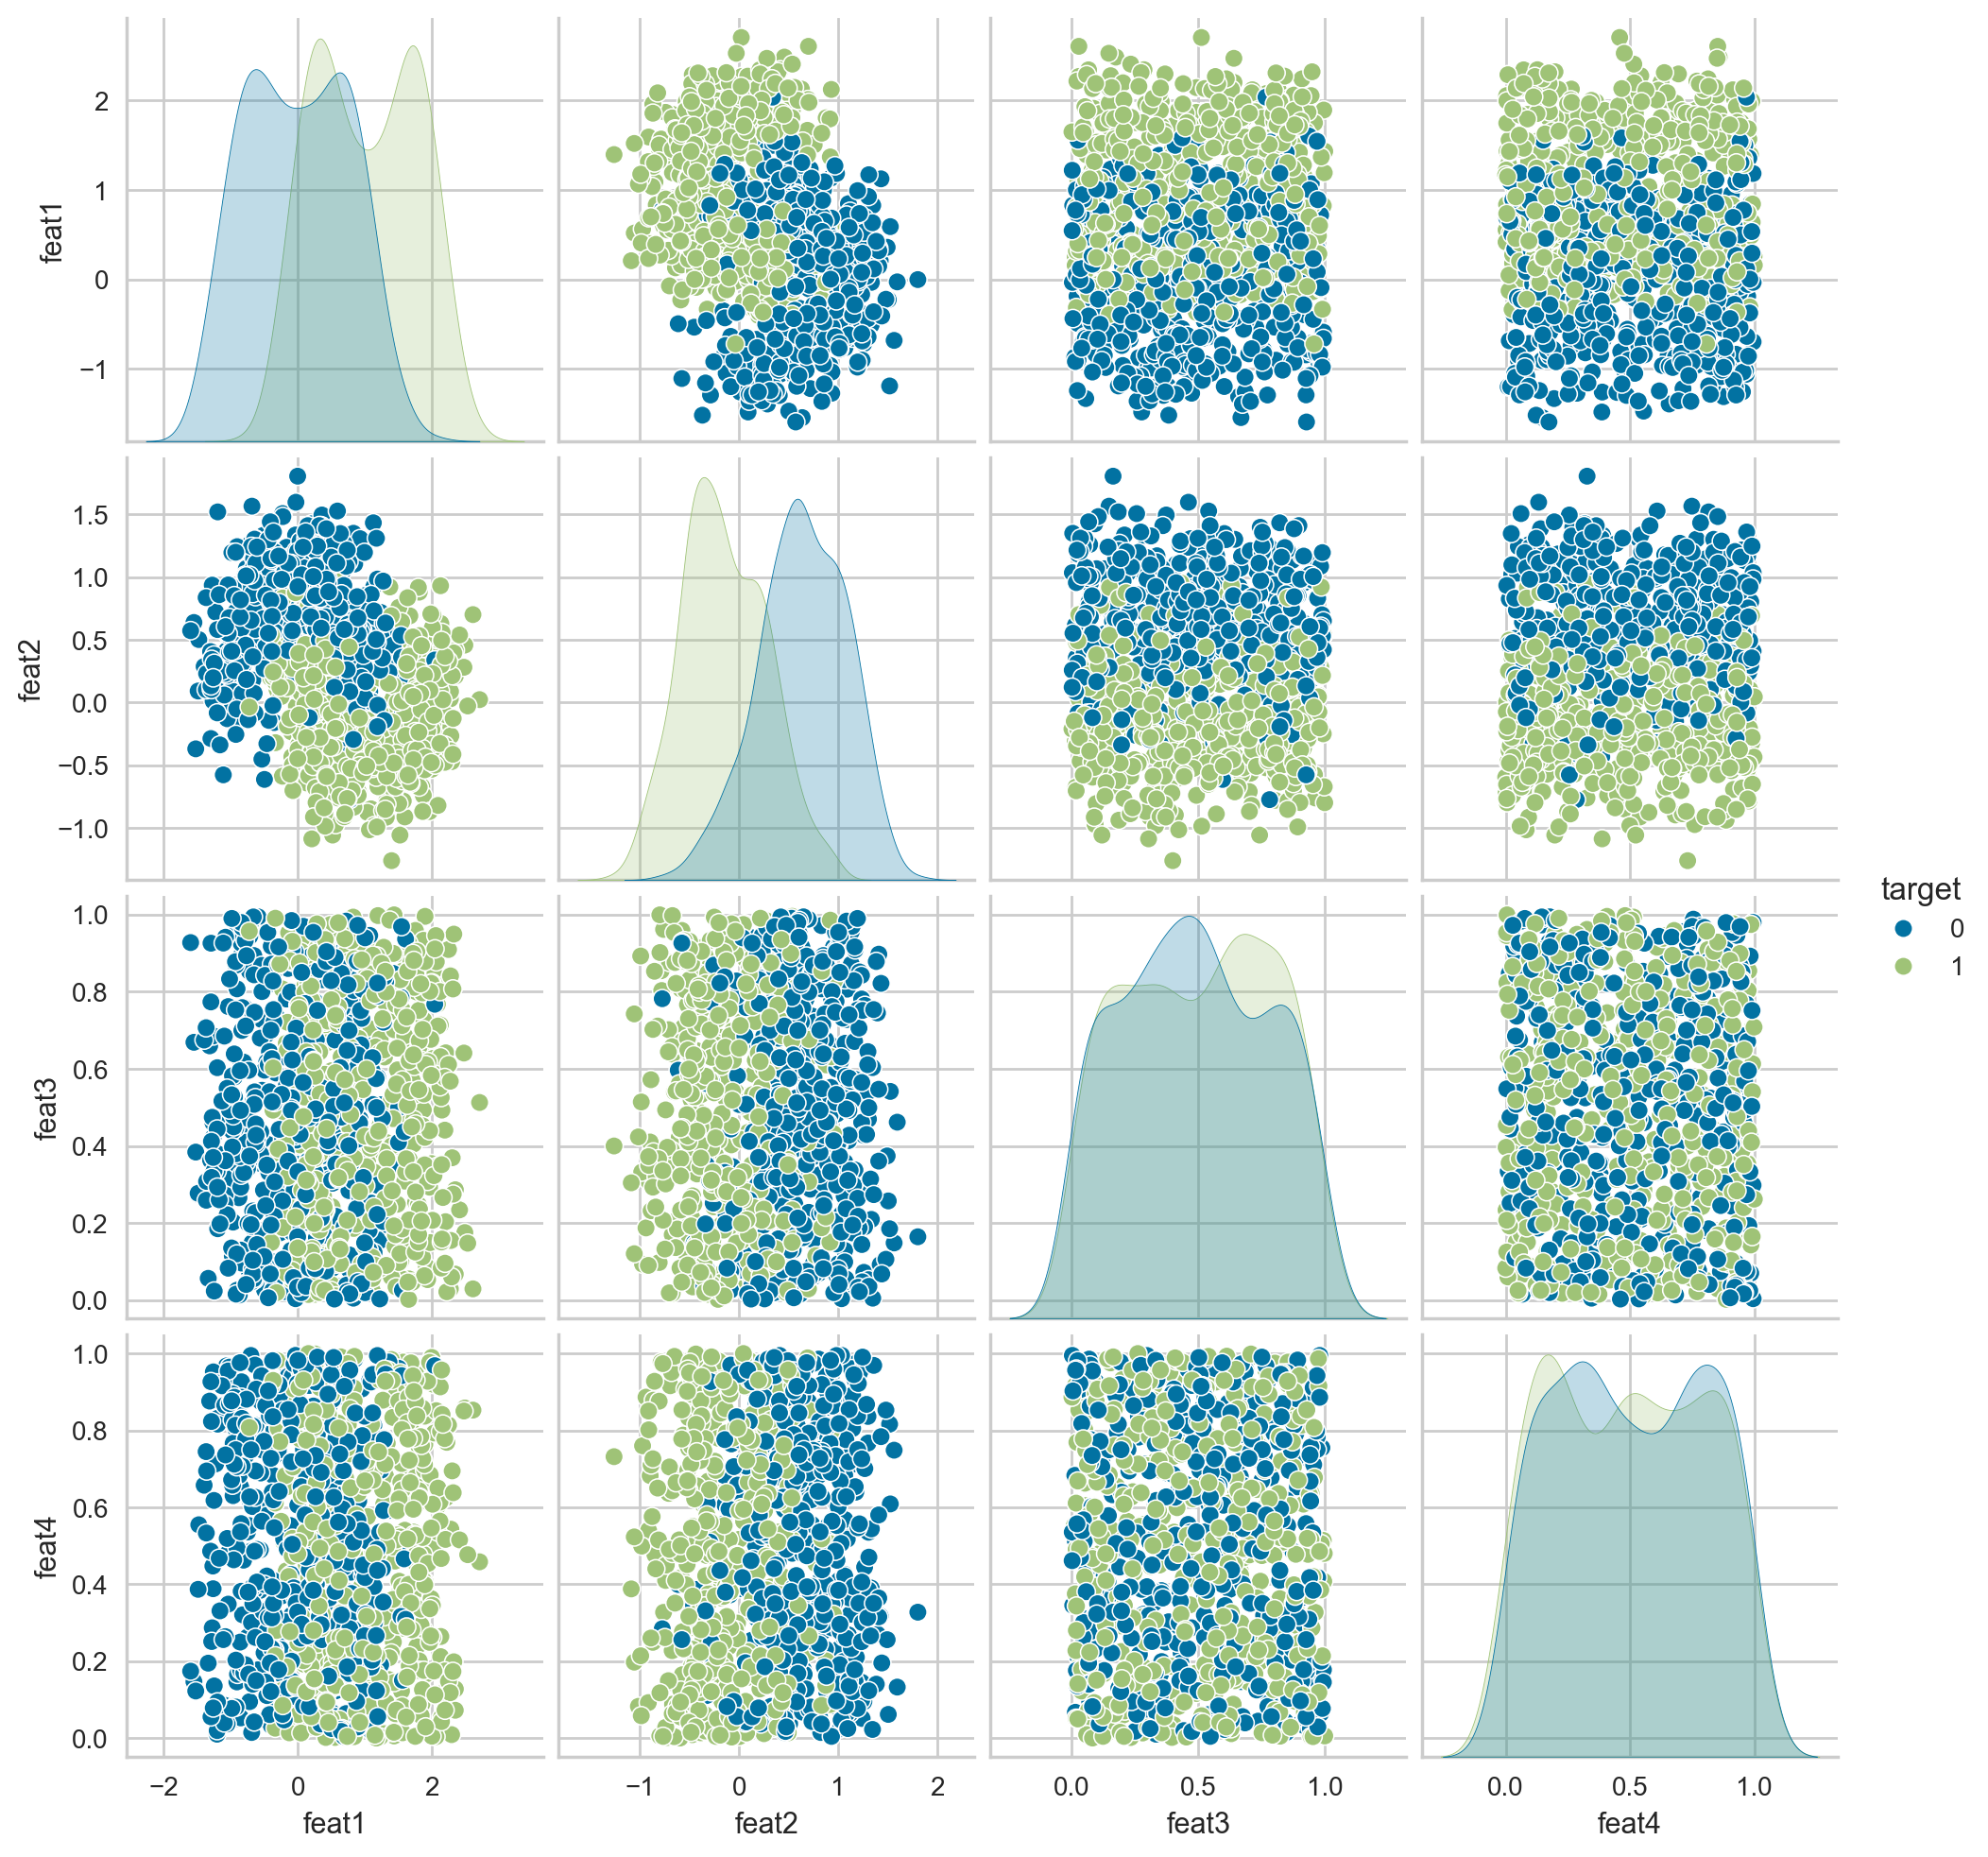

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

In [3]:
df.head()

,feat1,feat2,feat3,feat4,target
0,2.129573,0.629904,0.814821,0.264128,1
1,1.888882,0.146257,0.442205,0.836892,1
2,-0.190357,0.383993,0.021965,0.972941,0
3,-0.404416,0.195282,0.853461,0.876533,1
4,0.373012,-0.429716,0.837914,0.321654,1


## Инициализация PyCaret

In [4]:
s = setup(data=df, target='target')

,Description,Value
0,Session id,8334
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


## Сравнение доступных алгоритмов

In [5]:
%%time

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9214,0.9569,0.9314,0.9141,0.9222,0.8429,0.8440,0.0270
et,Extra Trees Classifier,0.9186,0.9624,0.9314,0.9099,0.9197,0.8371,0.8390,0.0230
knn,K Neighbors Classifier,0.9129,0.9582,0.9314,0.8987,0.9141,0.8257,0.8277,0.0080
lightgbm,Light Gradient Boosting Machine,0.9129,0.9592,0.9171,0.9097,0.9131,0.8257,0.8263,0.1350
gbc,Gradient Boosting Classifier,0.9086,0.9604,0.9229,0.8981,0.9096,0.8171,0.8188,0.0180
ada,Ada Boost Classifier,0.8971,0.9568,0.8971,0.8983,0.8974,0.7943,0.7949,0.0190
dt,Decision Tree Classifier,0.8743,0.8743,0.8800,0.8714,0.8749,0.7486,0.7499,0.0040
lr,Logistic Regression,0.8514,0.9358,0.8543,0.8519,0.8519,0.7029,0.7050,0.2510
nb,Naive Bayes,0.8486,0.9365,0.8543,0.8457,0.8491,0.6971,0.6988,0.0040
qda,Quadratic Discriminant Analysis,0.8457,0.9339,0.8543,0.8422,0.8469,0.6914,0.6938,0.0040


CPU times: user 1.17 s, sys: 145 ms, total: 1.31 s
Wall time: 6.2 s


In [7]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8334, verbose=0,
                       warm_start=False)

## Подбор гиперпараметров

In [8]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9641,0.8857,0.9118,0.8986,0.8000,0.8003
1,0.8714,0.9665,0.9714,0.8095,0.8831,0.7429,0.7582
2,0.9286,0.9710,0.9143,0.9412,0.9275,0.8571,0.8575
3,0.9000,0.9437,0.9714,0.8500,0.9067,0.8000,0.8083
4,0.9143,0.9453,0.9143,0.9143,0.9143,0.8286,0.8286
5,0.8571,0.9616,0.9143,0.8205,0.8649,0.7143,0.7190
6,0.8857,0.9657,0.9429,0.8462,0.8919,0.7714,0.7765
7,0.8857,0.9661,0.9143,0.8649,0.8889,0.7714,0.7727
8,0.9571,0.9812,0.9714,0.9444,0.9577,0.9143,0.9147


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Анализ модели

In [9]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…